# Fine-tuning a YOLO11 Object Detection Model for Kidney Stones Detection

## Install Required Libraries

In [1]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 19.0 MB/s eta 0:00:00


## Import Libraries

In [18]:
import kagglehub
import os
import random
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Download the dataset from kaggle
The dataset we will use in this guide is the [Kidney Stone Images with Bounding Box Annotations](https://www.kaggle.com/datasets/safurahajiheidari/kidney-stone-images). After clicking the Download button on the dataset page, we copy the dataset download snippet and run it here to import the data.

In [2]:
# Download latest version
path = kagglehub.dataset_download("safurahajiheidari/kidney-stone-images")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/kidney-stone-images


In [3]:
os.listdir(path)

['README.dataset.txt',
 'README.roboflow.txt',
 'data.yaml',
 'valid',
 'test',
 'train']

## Visualize Random Images with Bounding Boxes

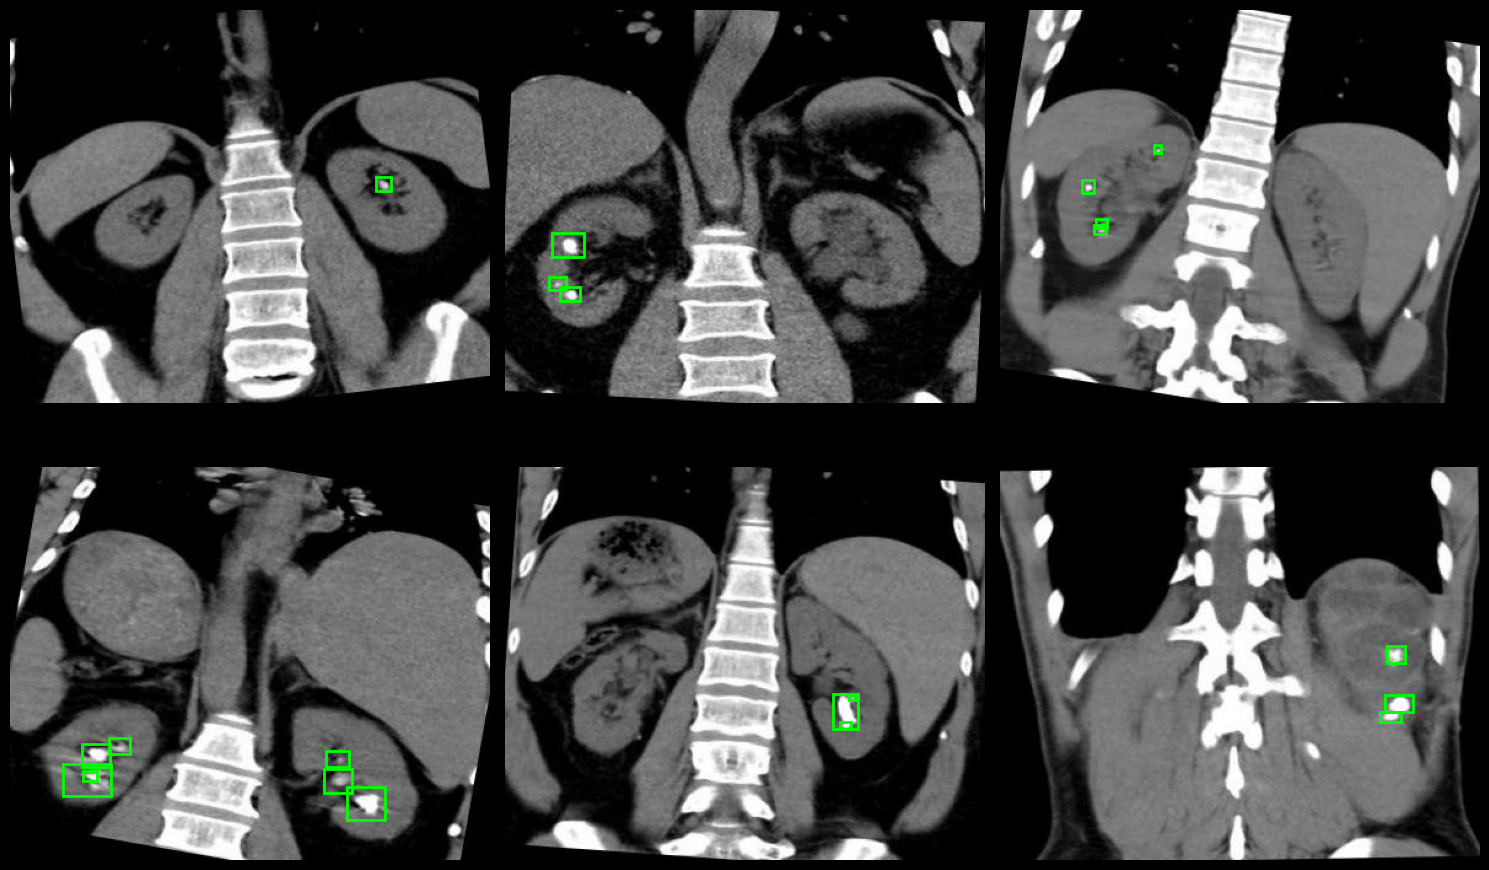

In [44]:
split = "train"

# Construct image and label paths
image_folder = os.path.join(path, split, "images")
label_folder = os.path.join(path, split, "labels")

# Get a list of image files
image_files = [f for f in os.listdir(image_folder)]

# Select 6 random images
random_images = random.sample(image_files, 6)

# Create a 2x3 grid for visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Set dark mode for matplotlib
plt.style.use('dark_background')

for i, ax in enumerate(axes.flat):
    image_path = os.path.join(image_folder, random_images[i])

    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Read the corresponding YOLO annotation file
    label_file = os.path.join(label_folder, random_images[i].replace(".jpg", ".txt"))

    # Get image dimensions
    height, width, _ = image.shape

    # Read bounding box annotations
    if os.path.exists(label_file):
        with open(label_file, "r") as f:
            for line in f:
                values = line.strip().split()
                class_id = int(values[0])  # First value is class ID
                x_center, y_center, bbox_width, bbox_height = map(float, values[1:])

                # Convert YOLO format to bounding box coordinates
                x_min = int((x_center - bbox_width / 2) * width)
                y_min = int((y_center - bbox_height / 2) * height)
                x_max = int((x_center + bbox_width / 2) * width)
                y_max = int((y_center + bbox_height / 2) * height)

                # Draw bounding box
                rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, fill=False, edgecolor=(0, 1, 0), linewidth=2)
                ax.add_patch(rect)

    ax.imshow(image)
    ax.axis("off")

plt.tight_layout()
plt.savefig("sample_images.png")
plt.show()


## Fine-tune the YOLO11 Model

In [6]:
!yolo task=detect mode=train model=yolo11n.pt data={path}/data.yaml epochs=50 imgsz=416 plots=True

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 5.35M/5.35M [00:00<00:00, 63.2MB/s]
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cpu CPU (Intel Xeon 2.00GHz)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/input/kidney-stone-images/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=

In [51]:
!ls /content/runs/detect/train/

args.yaml			 P_curve.png	   train_batch1.jpg	  val_batch0_pred.jpg
confusion_matrix_normalized.png  PR_curve.png	   train_batch2640.jpg	  val_batch1_labels.jpg
confusion_matrix.png		 R_curve.png	   train_batch2641.jpg	  val_batch1_pred.jpg
F1_curve.png			 results.csv	   train_batch2642.jpg	  val_batch2_labels.jpg
labels_correlogram.jpg		 results.png	   train_batch2.jpg	  val_batch2_pred.jpg
labels.jpg			 train_batch0.jpg  val_batch0_labels.jpg  weights


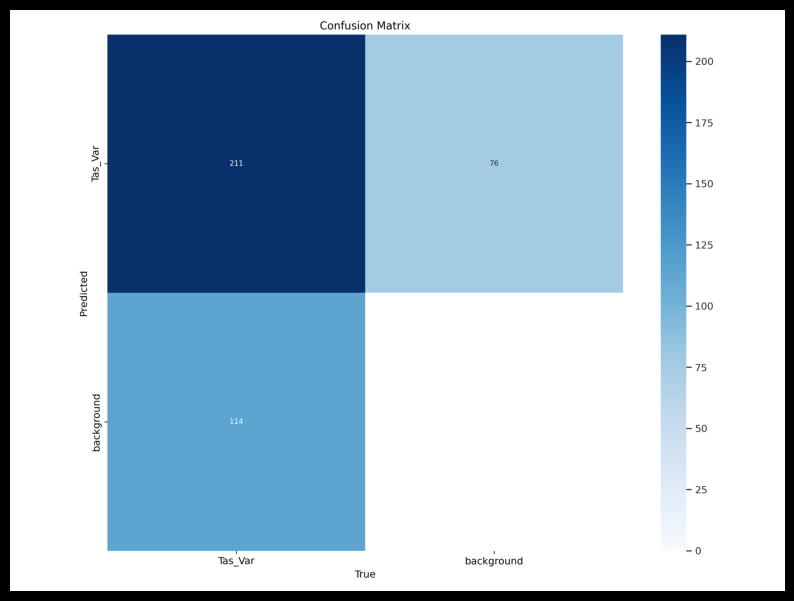

Displayed: /content/runs/detect/train/confusion_matrix.png


In [58]:
# Path to the confusion matrix image
image_path = f'/content/runs/detect/train/confusion_matrix.png'

# Read the image using matplotlib
img = mpimg.imread(image_path)

# Display the image using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')  # Hide the axes
plt.savefig("confusion_matrix.png", bbox_inches='tight')
plt.show()

print(f"Displayed: {image_path}")


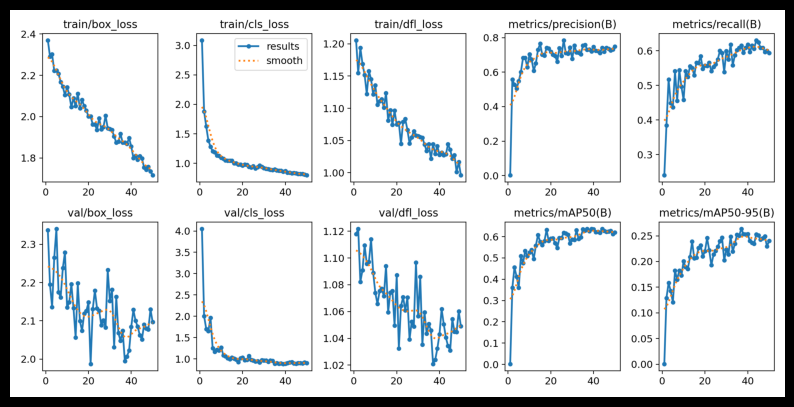

Displayed: /content/runs/detect/train/results.png


In [57]:
# Path to the results image
image_path = f'/content/runs/detect/train/results.png'

# Read the image using matplotlib
img = mpimg.imread(image_path)

# Display the image using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')  # Hide the axes

# Save the image with tight bounding box to remove padding
plt.savefig("training_results.png", bbox_inches='tight', pad_inches=0)

# Show the image
plt.show()

print(f"Displayed: {image_path}")

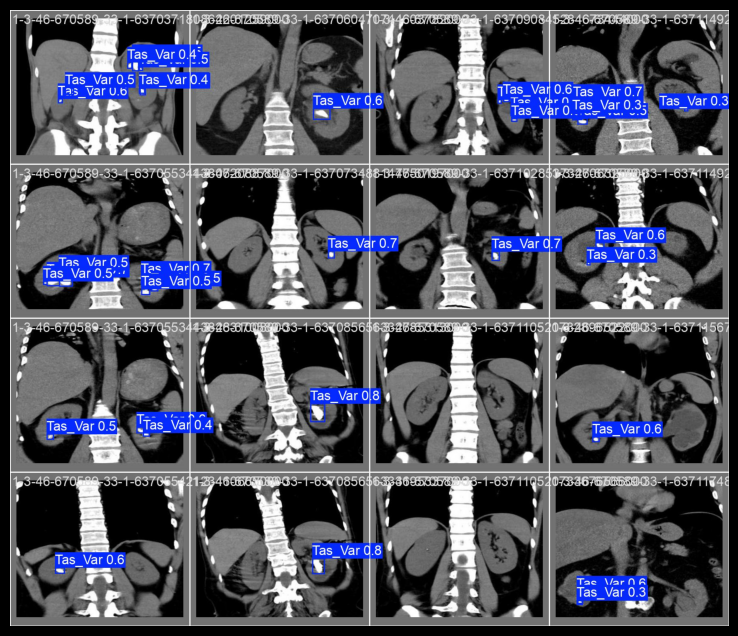

In [59]:
# Path to the image
img_path = f'/content/runs/detect/train/val_batch0_pred.jpg'

# Read the image using matplotlib
img = mpimg.imread(img_path)

# Display the image
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.savefig("batch_0_prediction.png", bbox_inches='tight')
plt.show()


## Validate Fine-tuned Model on Test Set

In [60]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={path}/data.yaml split=test

Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cpu CPU (Intel Xeon 2.00GHz)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /kaggle/input/kidney-stone-images/test/labels... 123 images, 0 backgrounds, 0 corrupt: 100% 123/123 [00:00<00:00, 433.12it/s]
val: WARNING ⚠️ Cache directory /kaggle/input/kidney-stone-images/test is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:05<00:00,  1.52it/s]
                   all        123        224      0.815      0.687      0.705      0.315
Speed: 0.4ms preprocess, 28.1ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [31]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={path}/test/images save=True

Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cpu CPU (Intel Xeon 2.00GHz)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/123 /kaggle/input/kidney-stone-images/test/images/1-3-46-670589-33-1-63703718086120120200001-5487554579919763006_png_jpg.rf.9fd67251e99a47dbe83a5db6efe6c016.jpg: 352x416 2 Tas_Vars, 67.6ms
image 2/123 /kaggle/input/kidney-stone-images/test/images/1-3-46-670589-33-1-63705534438365105500001-5275982036206127404_png_jpg.rf.365c4daf2b772012fe47e07b9daec86e.jpg: 352x416 1 Tas_Var, 34.6ms
image 3/123 /kaggle/input/kidney-stone-images/test/images/1-3-46-670589-33-1-63705540012666937300001-5673688970564737961_png_jpg.rf.15cca2fecc5f56865de3eb405476b90d.jpg: 352x416 1 Tas_Var, 35.0ms
image 4/123 /kaggle/input/kidney-stone-images/test/images/1-3-46-670589-33-1-63705542123217653900001-5305208767418446842_png_jpg.rf.d6f32a0ac819e4f2a870edfc1ce8079b.jpg: 352x416 2 Tas_Vars, 34.2ms
image 5/123 /kaggle/input/kidney-stone-images/test/i

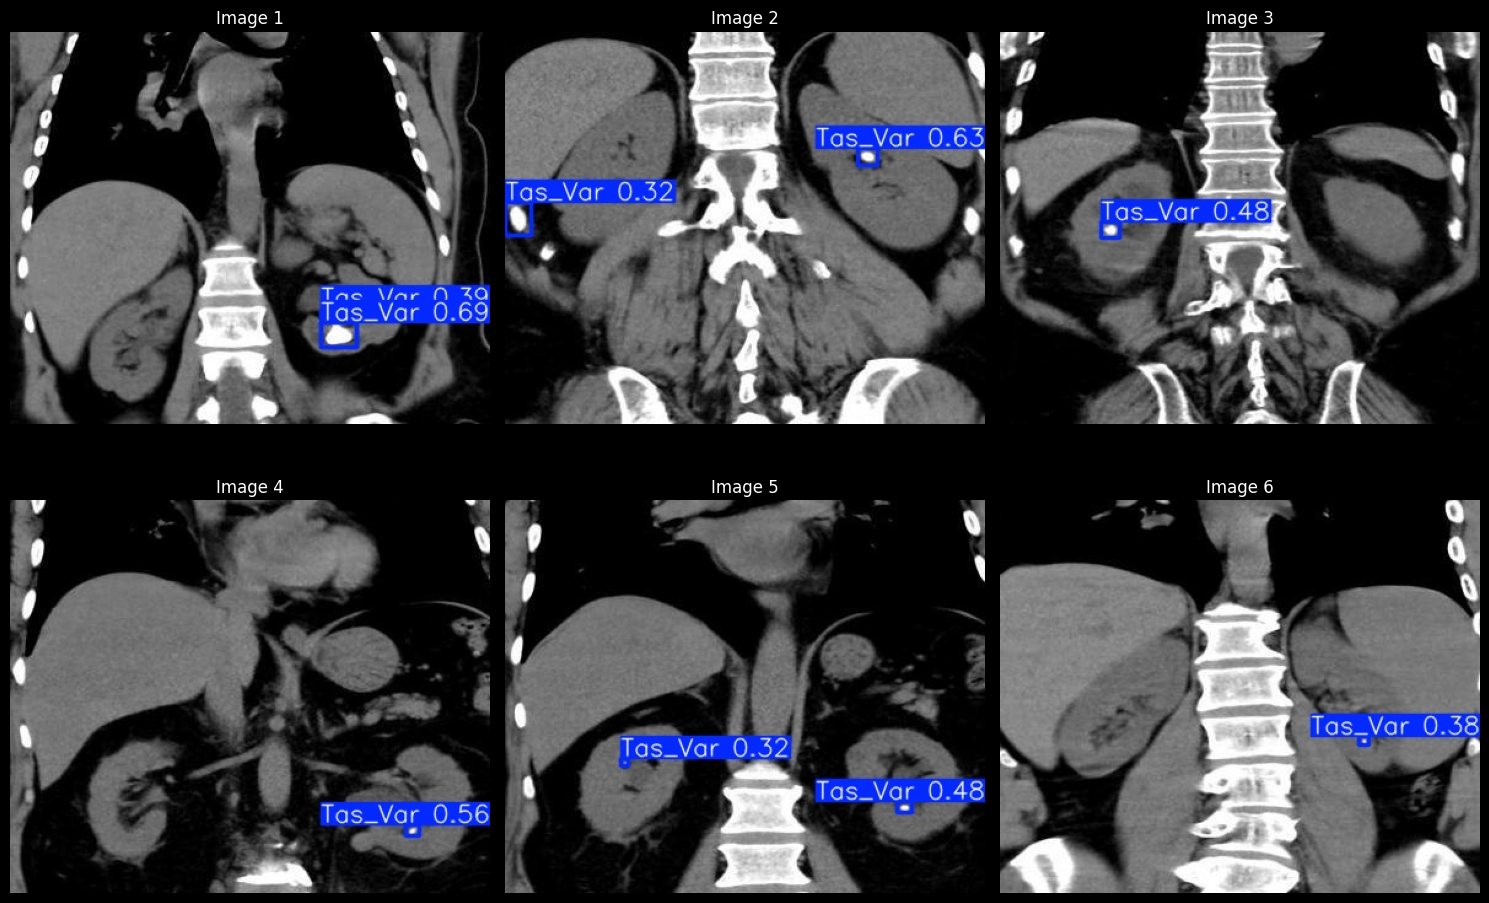

Displayed: /content/runs/detect/predict/1-3-46-670589-33-1-63740863580218783500001-5558521882885011993_png_jpg.rf.2fb14f6a674b0c7cb403f2b1e8da4215.jpg
Displayed: /content/runs/detect/predict/1-3-46-670589-33-1-63738957179074524100001-5408839826702883633_png_jpg.rf.22cd2cfe17608bd6192184e5427f4543.jpg
Displayed: /content/runs/detect/predict/1-3-46-670589-33-1-63705540012666937300001-5673688970564737961_png_jpg.rf.15cca2fecc5f56865de3eb405476b90d.jpg
Displayed: /content/runs/detect/predict/1-3-46-670589-33-1-63742939456580448800001-4663254346399718819_png_jpg.rf.9c5d4e116bec0275104b14b3f7b5b10e.jpg
Displayed: /content/runs/detect/predict/1-3-46-670589-33-1-63742939456749458500001-4962227765358704856_png_jpg.rf.9e1bcdf85edc4c26b13e14e896cd7fae.jpg
Displayed: /content/runs/detect/predict/1-3-46-670589-33-1-63740182336793977500001-5411618083031416674_png_jpg.rf.e5633e55c0ecfc3f3df68ae9cc6ac411.jpg


In [62]:
# Get the latest prediction folder
latest_folder = max(glob.glob(f'/content/runs/detect/predict*/'), key=os.path.getmtime)

# Get the image paths
image_paths = glob.glob(f'{latest_folder}/*.jpg')[:6]  # Fetch 6 images for the grid

# Create a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Loop over the images and axes
for i, img_path in enumerate(image_paths):
    img = mpimg.imread(img_path)  # Read the image using matplotlib

    ax = axes[i]  # Select the corresponding axis
    ax.imshow(img)
    ax.axis('off')  # Hide the axes
    ax.set_title(f"Image {i+1}")  # Optional: Set the title for each image

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig("model_inference_images.png")

# Show the grid of images
plt.show()

# Print the paths of the displayed images
for img_path in image_paths:
    print(f"Displayed: {img_path}")